# Problem -1 (Audit Task)

In [39]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [2]:
df = pd.read_csv('audit_data/audit_risk.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
df.shape

(776, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [6]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [9]:
df.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [10]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [11]:
# Money_Value has 1 missing value. Replacing the missing value by the median of the column

df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [12]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

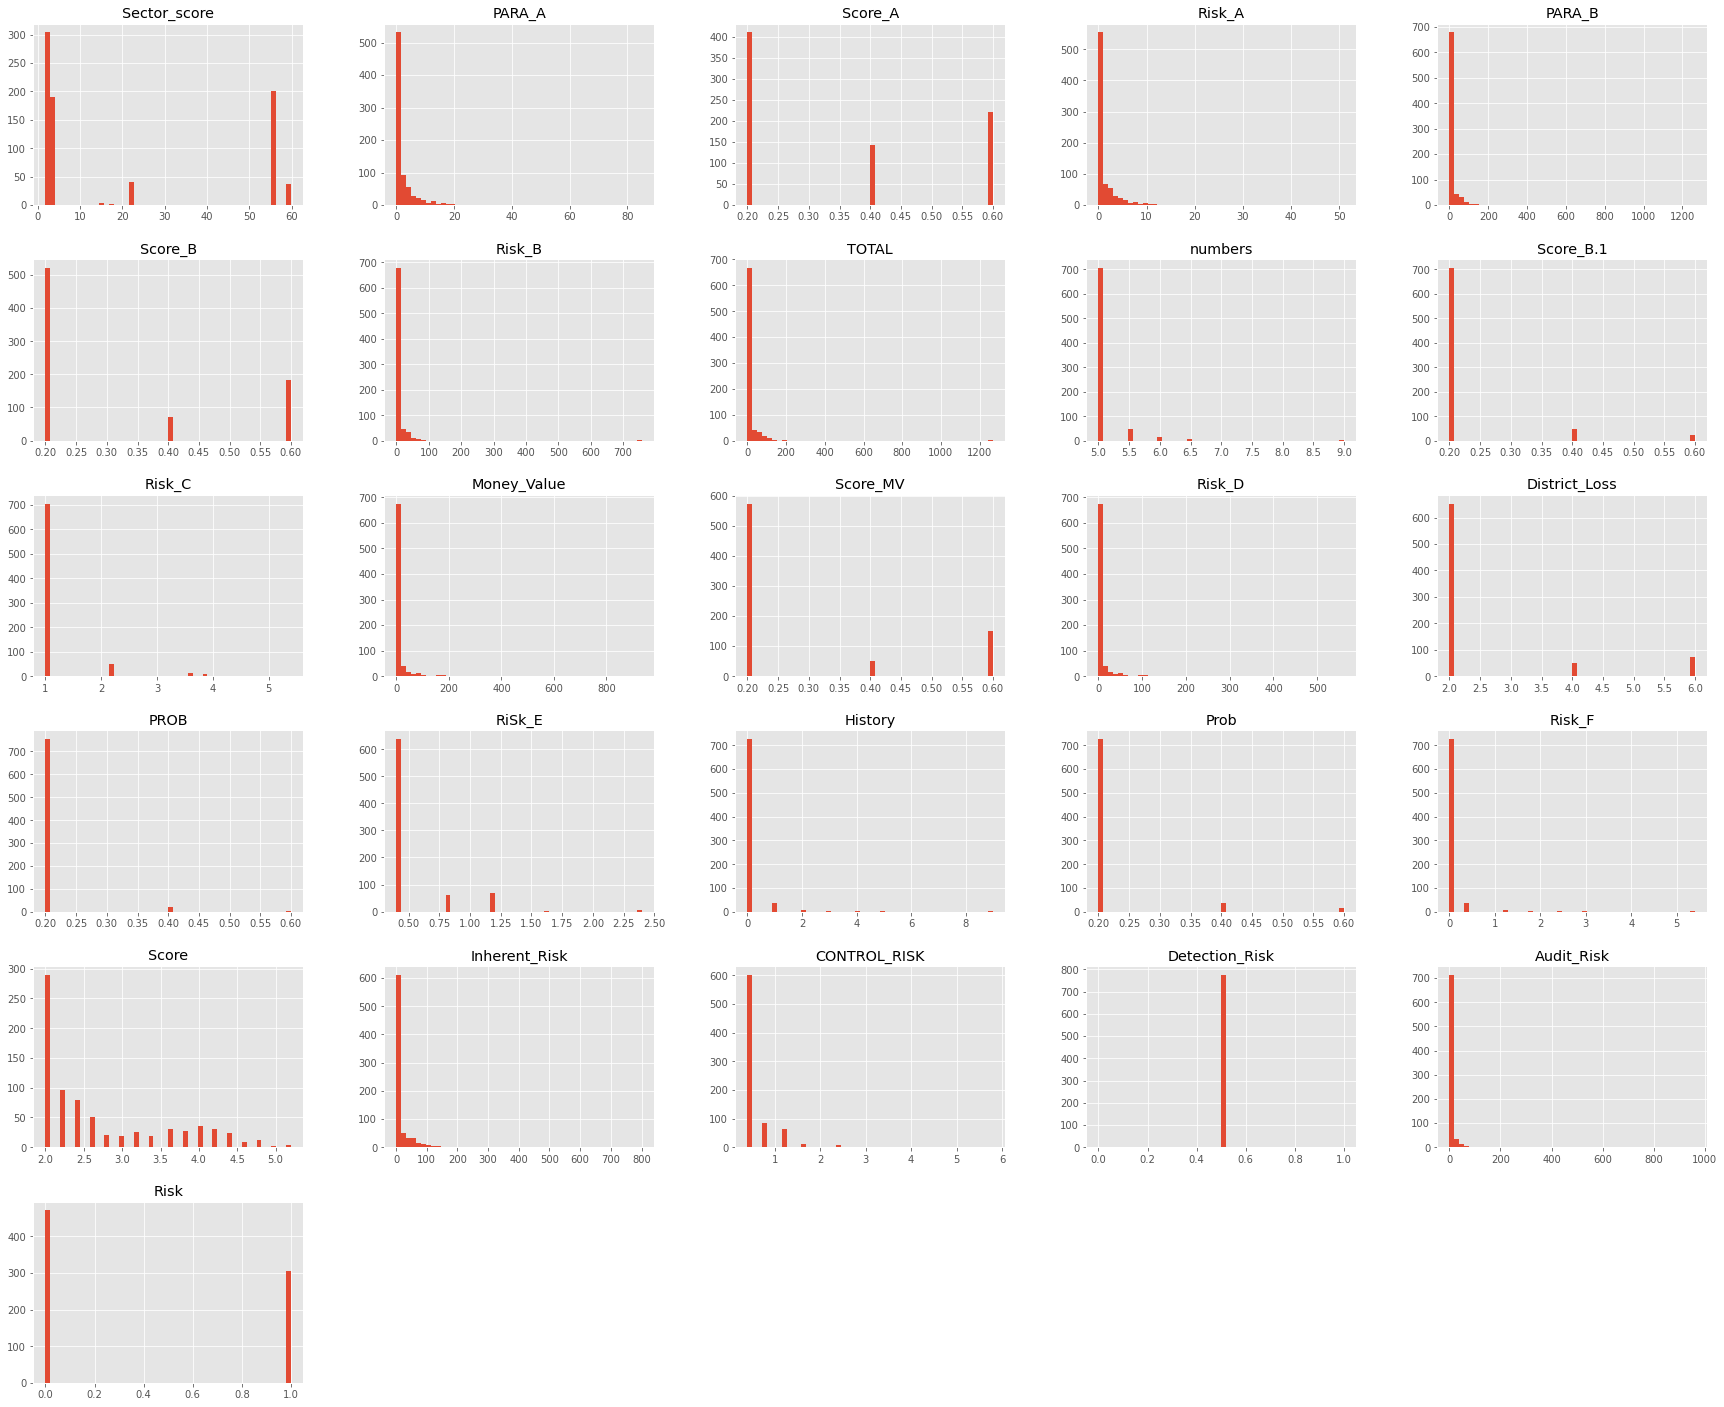

In [13]:
df.hist(bins=50, figsize=(30, 25))
plt.savefig('plots/all_column_histogram.jpg')
plt.show()

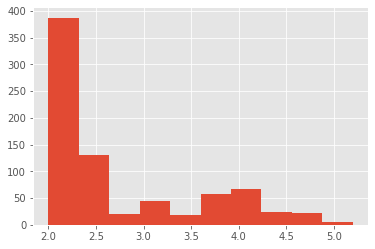

In [14]:
df['Score'].hist()
plt.savefig('plots/score.jpg')
plt.show()

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.00,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.09,-0.13,-0.11,-0.14,-0.10,-0.34,-0.17,-0.15,nan,-0.09,-0.39
PARA_A,-0.22,1.00,0.50,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.17,0.10,0.43,0.48,0.15,nan,0.22,0.38
Score_A,-0.43,0.50,1.00,0.50,0.25,0.57,0.25,0.30,0.24,0.27,0.27,0.21,0.48,0.20,0.09,0.09,0.10,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.20,0.62
Risk_A,-0.22,1.00,0.50,1.00,0.17,0.36,0.17,0.27,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22,0.39
PARA_B,-0.13,0.16,0.25,0.17,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.20,0.40,0.65,0.19,nan,0.89,0.26
Score_B,-0.22,0.36,0.57,0.36,0.35,1.00,0.35,0.38,0.28,0.31,0.30,0.21,0.57,0.20,-0.00,0.09,0.02,0.20,0.31,0.17,0.90,0.37,0.13,nan,0.21,0.64
Risk_B,-0.13,0.16,0.25,0.17,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.20,0.40,0.65,0.19,nan,0.89,0.26
TOTAL,-0.15,0.27,0.30,0.27,0.99,0.38,0.99,1.00,0.22,0.24,0.23,0.17,0.34,0.17,0.09,0.05,0.09,0.21,0.33,0.20,0.43,0.69,0.20,nan,0.89,0.29
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,0.22,1.00,0.91,0.96,0.19,0.45,0.19,0.13,0.04,0.14,0.20,0.21,0.20,0.50,0.27,0.23,nan,0.22,0.31
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.24,0.91,1.00,0.99,0.22,0.51,0.22,0.15,0.04,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26,0.35


In [16]:
#Detection_Risk has no relation so dropping it

df = df.drop(['Detection_Risk'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   Score_A        776 non-null    float64
 4   Risk_A         776 non-null    float64
 5   PARA_B         776 non-null    float64
 6   Score_B        776 non-null    float64
 7   Risk_B         776 non-null    float64
 8   TOTAL          776 non-null    float64
 9   numbers        776 non-null    float64
 10  Score_B.1      776 non-null    float64
 11  Risk_C         776 non-null    float64
 12  Money_Value    776 non-null    float64
 13  Score_MV       776 non-null    float64
 14  Risk_D         776 non-null    float64
 15  District_Loss  776 non-null    int64  
 16  PROB           776 non-null    float64
 17  RiSk_E         776 non-null    float64
 18  History   

In [17]:
#Keeping just the columns that are correlated with the target variable and not with other independent variables.

df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK', 'Audit_Risk', 'Risk']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk
Risk_A,1.00,0.17,0.14,0.45,0.12,0.18,0.43,0.15,0.22,0.39
Risk_B,0.17,1.00,0.22,0.12,0.08,0.32,0.40,0.19,0.89,0.26
Risk_C,0.14,0.22,1.00,0.22,0.15,0.24,0.55,0.25,0.25,0.34
Risk_D,0.45,0.12,0.22,1.00,0.03,0.11,0.29,0.07,0.33,0.25
RiSk_E,0.12,0.08,0.15,0.03,1.00,0.12,0.24,0.73,0.20,0.41
Prob,0.18,0.32,0.24,0.11,0.12,1.00,0.44,0.64,0.43,0.30
Score,0.43,0.40,0.55,0.29,0.24,0.44,1.00,0.36,0.33,0.79
CONTROL_RISK,0.15,0.19,0.25,0.07,0.73,0.64,0.36,1.00,0.36,0.42
Audit_Risk,0.22,0.89,0.25,0.33,0.20,0.43,0.33,0.36,1.00,0.22
Risk,0.39,0.26,0.34,0.25,0.41,0.30,0.79,0.42,0.22,1.00


# Classification

In [18]:
new_df = df.copy()

In [19]:
# Getting independent features

X = new_df.drop('Risk', axis=1)
X.head()

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk
0,2.508,0.500,1.0,0.676,0.4,0.2,2.4,0.4,1.7148
1,0.000,0.966,1.0,0.188,0.4,0.2,2.0,0.4,0.5108
2,0.102,0.046,1.0,0.000,0.4,0.2,2.0,0.4,0.3096
3,0.000,6.480,3.6,7.050,0.4,0.2,4.4,0.4,3.5060
4,0.000,0.016,1.0,0.000,0.4,0.2,2.0,0.4,0.2832


In [40]:
# Getting Dependent feature

y = df.Risk
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [25]:
new_df.shape

(776, 10)

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 123)

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

## Classification Models

In [43]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=47)

In [63]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

In [64]:
acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean()

0.6483870967741936

In [56]:
y_predict_r = random_forest_e.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rande.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

print(model_results)

           Model  Accuracy  Cross Val Accuracy  Precision    Recall  F1 Score  \
0  Random Forest  0.634615            0.648387   0.547619  0.377049  0.446602   

        ROC  
0  0.588525  


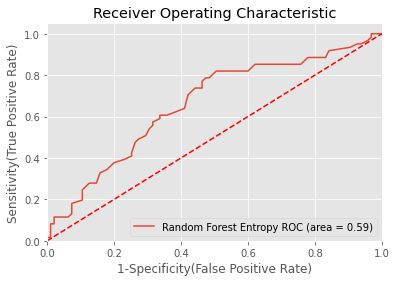

In [60]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'Random Forest Entropy',
        'model': RandomForestClassifier(
            n_estimators = 100,
            criterion='entropy',                    
            random_state = 47
        )
    }
    
]

for m in models:
    model = m['model']
    model.fit(X_train_scaled, y_train) 
    y_pred=model.predict(X_test_scaled)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])

    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()